In [128]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [129]:
df = pd.read_csv('auto-mpg.csv')

In [130]:
df

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [131]:
df = pd.read_csv('auto-mpg.csv', header=None)

In [132]:
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [133]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

In [134]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [135]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

In [136]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

In [137]:
# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
x=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

In [139]:
# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
x=ndf[['weight']].values  #독립 변수 X 값만 추출
y=ndf['mpg'].values     #종속 변수 Y 값만 추출

In [140]:
x, y

(array([[3504.],
        [3693.],
        [3436.],
        [3433.],
        [3449.],
        [4341.],
        [4354.],
        [4312.],
        [4425.],
        [3850.],
        [3563.],
        [3609.],
        [3761.],
        [3086.],
        [2372.],
        [2833.],
        [2774.],
        [2587.],
        [2130.],
        [1835.],
        [2672.],
        [2430.],
        [2375.],
        [2234.],
        [2648.],
        [4615.],
        [4376.],
        [4382.],
        [4732.],
        [2130.],
        [2264.],
        [2228.],
        [2634.],
        [3439.],
        [3329.],
        [3302.],
        [3288.],
        [4209.],
        [4464.],
        [4154.],
        [4096.],
        [4955.],
        [4746.],
        [5140.],
        [2962.],
        [2408.],
        [3282.],
        [3139.],
        [2220.],
        [2123.],
        [2074.],
        [2065.],
        [1773.],
        [1613.],
        [1834.],
        [1955.],
        [2278.],
        [2126.],
        [2254.

In [142]:
x.shape, y.shape

((392, 1), (392,))

In [143]:
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

In [155]:
# 데이터 셋 분리 (train/test)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =\
train_test_split(x,y, 
                test_size=0.3,
                random_state=42)

In [156]:
x_train.shape, x_test.shape

((274, 1), (118, 1))

In [146]:
# 비선형회귀분석 모형 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

In [147]:
poly = PolynomialFeatures(degree=2)  # 차수=2차항

In [148]:
x_train

array([[2379.],
       [2587.],
       [2434.],
       [2648.],
       [3336.],
       [1970.],
       [2694.],
       [2740.],
       [2035.],
       [2190.],
       [3432.],
       [2215.],
       [2640.],
       [2464.],
       [2868.],
       [2144.],
       [3880.],
       [2219.],
       [2391.],
       [2020.],
       [3288.],
       [3955.],
       [4055.],
       [3630.],
       [3250.],
       [2408.],
       [2310.],
       [2735.],
       [2592.],
       [4354.],
       [3360.],
       [2800.],
       [3563.],
       [1990.],
       [4906.],
       [2506.],
       [1945.],
       [2755.],
       [2110.],
       [4380.],
       [2065.],
       [2085.],
       [4952.],
       [1985.],
       [2489.],
       [3205.],
       [4237.],
       [4422.],
       [3664.],
       [3121.],
       [2003.],
       [3190.],
       [3278.],
       [3520.],
       [4456.],
       [2234.],
       [4209.],
       [2125.],
       [2807.],
       [4502.],
       [2490.],
       [2525.],
       [

In [149]:
poly.fit_transform(x_train)

array([[1.0000000e+00, 2.3790000e+03, 5.6596410e+06],
       [1.0000000e+00, 2.5870000e+03, 6.6925690e+06],
       [1.0000000e+00, 2.4340000e+03, 5.9243560e+06],
       [1.0000000e+00, 2.6480000e+03, 7.0119040e+06],
       [1.0000000e+00, 3.3360000e+03, 1.1128896e+07],
       [1.0000000e+00, 1.9700000e+03, 3.8809000e+06],
       [1.0000000e+00, 2.6940000e+03, 7.2576360e+06],
       [1.0000000e+00, 2.7400000e+03, 7.5076000e+06],
       [1.0000000e+00, 2.0350000e+03, 4.1412250e+06],
       [1.0000000e+00, 2.1900000e+03, 4.7961000e+06],
       [1.0000000e+00, 3.4320000e+03, 1.1778624e+07],
       [1.0000000e+00, 2.2150000e+03, 4.9062250e+06],
       [1.0000000e+00, 2.6400000e+03, 6.9696000e+06],
       [1.0000000e+00, 2.4640000e+03, 6.0712960e+06],
       [1.0000000e+00, 2.8680000e+03, 8.2254240e+06],
       [1.0000000e+00, 2.1440000e+03, 4.5967360e+06],
       [1.0000000e+00, 3.8800000e+03, 1.5054400e+07],
       [1.0000000e+00, 2.2190000e+03, 4.9239610e+06],
       [1.0000000e+00, 2.391

In [150]:
x_train_poly = poly.fit_transform(x_train)
x_train_poly

array([[1.0000000e+00, 2.3790000e+03, 5.6596410e+06],
       [1.0000000e+00, 2.5870000e+03, 6.6925690e+06],
       [1.0000000e+00, 2.4340000e+03, 5.9243560e+06],
       [1.0000000e+00, 2.6480000e+03, 7.0119040e+06],
       [1.0000000e+00, 3.3360000e+03, 1.1128896e+07],
       [1.0000000e+00, 1.9700000e+03, 3.8809000e+06],
       [1.0000000e+00, 2.6940000e+03, 7.2576360e+06],
       [1.0000000e+00, 2.7400000e+03, 7.5076000e+06],
       [1.0000000e+00, 2.0350000e+03, 4.1412250e+06],
       [1.0000000e+00, 2.1900000e+03, 4.7961000e+06],
       [1.0000000e+00, 3.4320000e+03, 1.1778624e+07],
       [1.0000000e+00, 2.2150000e+03, 4.9062250e+06],
       [1.0000000e+00, 2.6400000e+03, 6.9696000e+06],
       [1.0000000e+00, 2.4640000e+03, 6.0712960e+06],
       [1.0000000e+00, 2.8680000e+03, 8.2254240e+06],
       [1.0000000e+00, 2.1440000e+03, 4.5967360e+06],
       [1.0000000e+00, 3.8800000e+03, 1.5054400e+07],
       [1.0000000e+00, 2.2190000e+03, 4.9239610e+06],
       [1.0000000e+00, 2.391

In [151]:
x_train.shape, x_train_poly.shape

((274, 1), (274, 3))

In [152]:
# 모델학습(train data)

plr = LinearRegression()

In [153]:
plr.fit(x_train_poly, y_train)

LinearRegression()

In [154]:
# 학습을 마친 모형에 test data 적용, 결정계수 계산

x_test_poly = poly.fit_transform(x_test)  # x_test 데이터를 2차항으로 변형 
x_test_poly

array([[1.0000000e+00, 2.1890000e+03, 4.7917210e+06],
       [1.0000000e+00, 2.7950000e+03, 7.8120250e+06],
       [1.0000000e+00, 1.8000000e+03, 3.2400000e+06],
       [1.0000000e+00, 1.9550000e+03, 3.8220250e+06],
       [1.0000000e+00, 2.7900000e+03, 7.7841000e+06],
       [1.0000000e+00, 2.1550000e+03, 4.6440250e+06],
       [1.0000000e+00, 4.7460000e+03, 2.2524516e+07],
       [1.0000000e+00, 2.2650000e+03, 5.1302250e+06],
       [1.0000000e+00, 3.2640000e+03, 1.0653696e+07],
       [1.0000000e+00, 1.8670000e+03, 3.4856890e+06],
       [1.0000000e+00, 3.8500000e+03, 1.4822500e+07],
       [1.0000000e+00, 2.9300000e+03, 8.5849000e+06],
       [1.0000000e+00, 4.3600000e+03, 1.9009600e+07],
       [1.0000000e+00, 2.1710000e+03, 4.7132410e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.6050000e+03, 6.7860250e+06],
       [1.0000000e+00, 3.1020000e+03, 9.6224040e+06],
       [1.0000000e+00, 2.3500000e+03, 5.5225000e+06],
       [1.0000000e+00, 2.670

In [122]:
plr.score(x_test_poly, y_test)   # 예측값, 실제값 비교
# 결과해석 : 다항모형의 설명력은 67.9% 임

0.6790833164600332

In [123]:
r_square = plr.score(x_test_poly, y_test)  

In [124]:
print("다항회귀분석의 결정계수: ", r_square)

다항회귀분석의 결정계수:  0.6790833164600332


In [125]:
plr.predict(x_test_poly)  # test data로 예측 (test data)

array([30.48801583, 24.08150873, 35.31671593, 33.32556359, 24.12880673,
       30.88772522, 12.68788907, 29.61001854, 20.05634839, 34.44511331,
       16.17112131, 22.83943829, 13.8241748 , 30.69909372, 18.96947606,
       25.94388053, 21.35466604, 28.65337294, 25.29171746, 27.0304074 ,
       23.7250677 , 31.18435877, 32.95044993, 18.31145779, 33.22520758,
       29.61001854, 22.40529747, 18.7629821 , 33.38840638, 26.91466729,
       13.54337322, 20.47832842, 17.64088514, 25.64093909, 13.46375177,
       32.82615227, 12.95025207, 31.23203481, 14.07366819, 13.01170144,
       14.90961842, 31.44730979, 33.01273755, 29.21286715, 12.9009663 ,
       12.71263667, 19.91808672, 31.18435877, 28.09222113, 33.55223068,
       14.65626703, 29.46197591, 29.62143235, 30.82867609, 23.70645569,
       17.46801871, 20.3914942 , 22.98312316, 28.37709566, 30.03479422,
       12.30862704, 21.49654054, 24.99599324, 22.5991186 , 26.87269101,
       30.12730381, 24.80069433, 33.55223068, 19.29606011, 13.89

In [126]:
y_hat_test = plr.predict(x_test_poly)  # test data로 예측 

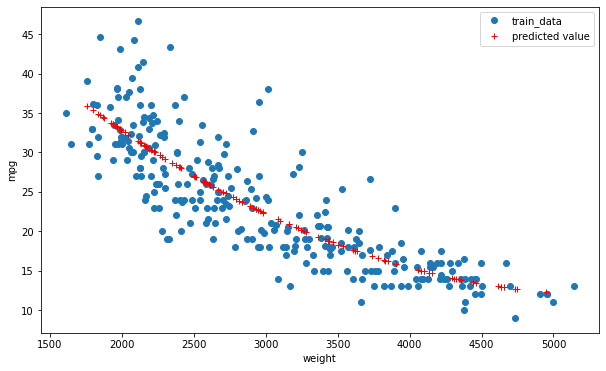

In [127]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x_train, y_train, 'o', label='train_data')
ax.plot(x_test,y_hat_test, 'r+', label='predicted value') 
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [157]:
# 모형 전체 x 데이터 입력 >> 예측한 값 y_hat을 실제값 y와 비교 

In [158]:
poly.fit_transform(x)

array([[1.0000000e+00, 3.5040000e+03, 1.2278016e+07],
       [1.0000000e+00, 3.6930000e+03, 1.3638249e+07],
       [1.0000000e+00, 3.4360000e+03, 1.1806096e+07],
       ...,
       [1.0000000e+00, 2.2950000e+03, 5.2670250e+06],
       [1.0000000e+00, 2.6250000e+03, 6.8906250e+06],
       [1.0000000e+00, 2.7200000e+03, 7.3984000e+06]])

In [159]:
x_poly = poly.fit_transform(x)

In [160]:
plr.predict(x_poly)

array([18.31145779, 17.0874025 , 18.7841992 , 18.80544961, 18.69249901,
       13.89434609, 13.84618981, 14.00402565, 13.59421921, 16.17112131,
       17.91515142, 17.61510505, 16.67934221, 21.48816537, 28.41012679,
       23.7250677 , 24.28078215, 26.12724429, 31.18435877, 34.85932849,
       25.27189888, 27.77742813, 28.37709566, 29.96556747, 25.51069894,
       13.01170144, 13.7661195 , 13.74459304, 12.71946374, 31.18435877,
       29.62143235, 30.03479422, 25.65098347, 18.7629821 , 19.56272362,
       19.76586907, 19.87226597, 14.4187375 , 13.46375177, 14.65626703,
       14.91888135, 12.30277388, 12.68788907, 12.09677047, 22.55491104,
       28.01595163, 19.91808672, 21.04957782, 30.12730381, 31.2678307 ,
       31.85721212, 31.96643185, 35.67265552, 37.83729622, 34.87233379,
       33.32556359, 29.46197591, 31.23203481, 29.73577394, 28.01595163,
       30.05789941, 14.15245523, 13.73387977, 14.74092459, 14.76793614,
       17.21687983, 12.96344408, 13.34204441, 13.49005538, 13.60

In [162]:
y_hat = plr.predict(x_poly)

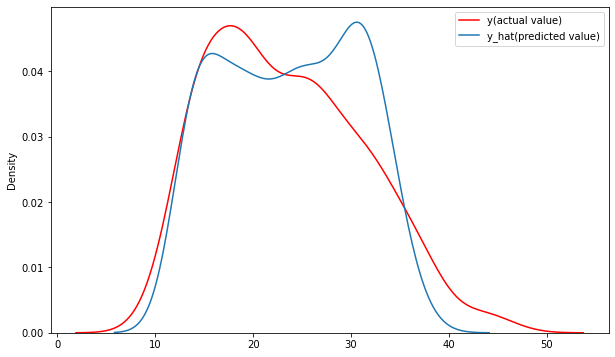

In [169]:
plt.figure(figsize=(10,6))
ax1 = sns.kdeplot(y, color='red', label='y(actual value)')
ax2 = sns.kdeplot(y_hat, label='y_hat(predicted value)', ax=ax1)
plt.legend(loc='best')
plt.show()